In [8]:
%matplotlib inline
import numpy as np

In [9]:
import matplotlib.pyplot as plt

In [10]:
import katarchive

import datetime

import logging
logging.root.setLevel(logging.ERROR)


In [11]:
begin="01/01/2016"
end="31/03/2016"


In [12]:
def findproj(text):
    found='Unknown'        # default
    chx=text.find('prop')
    if chx >0  :
        pr2=text[chx+11:chx+38].split()
        code=pr2[0]
        found=code.replace("=","")
    else:
        if text.find('maser') >0:
            found="Maser monitoring"
            #print text
    return found

In [13]:
print katarchive.search_archive(startdate=begin,enddate=end)


Searched using: CAS.ProductTypeName:(KatFile) AND CAS.ProductTransferStatus:RECEIVED AND StartTime:[2015-12-31T22:00:00Z TO 2016-03-31T21:59:59Z]
Returning 218 results
[['1', '2016-03-15 09:20:36 SAST', 'operator', [254105359]], ['1', '2016-03-15 07:46:22 SAST', 'Nadeem', [2157190535]], ['1', '2016-03-15 07:41:42 SAST', 'operator', [60262621]], ['1', '2016-03-14 17:18:58 SAST', 'Tony', [28318997214]], ['1', '2016-03-14 17:16:08 SAST', 'operator', [78695485]], ['1', '2016-03-14 15:09:36 SAST', 'Lindsay', [1018421454]], ['1', '2016-03-14 15:07:08 SAST', 'operator', [36696880]], ['1', '2016-03-14 12:29:52 SAST', 'Sean', [4862688172]], ['1', '2016-03-14 12:25:50 SAST', 'operator', [254123794]], ['1', '2016-03-14 10:38:17 SAST', 'Sean', [3344609799]], ['1', '2016-03-14 10:33:54 SAST', 'operator', [60178489]], ['1', '2016-03-14 09:04:33 SAST', 'Sean', [1605327739]], ['1', '2016-03-14 08:59:34 SAST', 'operator', [61356372]], ['1', '2016-03-14 07:52:06 SAST', 'Nadeem', [2156638992]], ['1', '20

In [14]:
f = katarchive.search_archive(startdate=begin)
start = datetime.datetime.strptime(f[-1].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')
end = datetime.datetime.strptime(f[0].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')

Searched using: CAS.ProductTypeName:(KatFile) AND CAS.ProductTransferStatus:RECEIVED AND StartTime:[2015-12-31T22:00:00Z TO 2016-03-15T21:59:59Z]
Returning 218 results


In [15]:
#print 'First file in run: ' , start.isoformat()
#print 'Last file in run: ' , end.isoformat()

In [16]:
for fi in f:
    txts=fi.metadata.InstructionSet
    p=findproj(txts)
    print fi.metadata.ExperimentID, p, fi.metadata.Duration, fi.metadata.Description, len(fi.metadata.Antennas)


2 COMM_Atten 107.71 Auto atten 5
2 COMM_Tipping_NO 3853.31 Tipping Curve 5
2 COMM_Atten 106.01 Auto atten 5
2 COMM_Delay_TF 50601.02 Delay Calibration 5
2 COMM_Atten 139.01 Auto atten 5
2 COMM_Point_LM 1818.14 Pointing Observation 5
2 COMM_Atten 64.01 Auto atten 5
2 COMM_RFI_SP 9073.1 RFI Scan in c16n25M4k 5
2 COMM_Atten 107.71 Auto atten 5
2 COMM_RFI_SP 5975.47 Basic RFI Scan: RFI SCAN 5
2 COMM_Atten 106.01 Auto atten 5
2 COMM_RFI_SP 2867.23 Basic RFI Scan: RFI SCAN 5
2 COMM_Atten 108.01 Auto atten 5
2 COMM_Tipping_NO 3852.31 Tipping Curve 5
2 COMM_Atten 107.01 Auto atten 5
2 COMM_Image_NO 58260.81 Imaging Calibration 5
2 COMM_Delay_TF 28032.22 Delay Calibration 5
2 COMM_Image_NO 28970.4 Imaging Calibration 5
2 COMM_RFI_SP 1303.1 Basic RFI Scan: RFI SCAN 5
2 COMM_RFI_SP 4075.32 Basic RFI Scan: RFI SCAN 5
2 COMM_RFI_SP 806.06 Basic RFI Scan: RFI SCAN 5
2 COMM_Atten 106.01 Auto atten 5
2 COMM_Image_NO 56010.77 Imaging Calibration 5
2 COMM_Atten 106.01 Auto atten 5
2 20141219SS-01 13640.

Only select observations that are longer than 1 hrs then extract the project id from the script parameters. If there is no project id then allocated No_project_id 

In [17]:
sbd = [] #Experiment ID
pid = [] #project ID
fnd = [] #Filename
dud = [] #Duration
antsd = [] #number of antennas
scrd = [] #script  -NOT USED NOW

for fi in f:
    if fi.metadata.Duration < 3600: #only pick hour long or greater observations for analysis
        continue
    # now try extract the project-id from the instruction-set string
    """
    script = fi.metadata.InstructionSet
    scrd.append(script)
    spl = script.split()
    """
    txts=fi.metadata.InstructionSet
    p=findproj(txts)
    if p == "Unknown":
        p="Maser Monitoring"
    sbd.append(fi.metadata.ExperimentID)
    pid.append(p)
    fnd.append(fi.metadata.Filename)
    dud.append(fi.metadata.Duration)
    antsd.append(len(fi.metadata.Antennas))


In [18]:
pi = np.array(pid)
sb = np.array(sbd)
du = np.array(dud)
ants = np.array(antsd)

p_cent = (sum(du)/((end.toordinal()-start.toordinal())*24*3600))*100

print 'Percentage system usage: ', np.floor(p_cent),'%'


Percentage system usage:  23.0 %


In [19]:
a_id = []
a_time = []
for p in set(pi):
    ind = pi == p
    print p,round(sum(du[ind])/3600,2)
    a_id.append(p)
    a_time.append(round(sum(du[ind])/3600,2))

COMM_Delay_TF 48.79
COMM_Tipping_NO 9.59
20150217RT-01 2.51
20150421TF-01 7.62
20140729RT-01 13.77
20150821LR-01 16.1
20130822NO-01 4.06
20150825LR-01 10.69
20150619TF-01 7.05
20141219SS-01 10.93
COMM_Image_NO 55.45
20150922SG-01 6.43
COMM_RFI_SP 30.05
Maser Monitoring 4.0


In [20]:
ind = np.argsort(a_id)
for i in ind:
    print ("%-16s %5.1f %d") %(a_id[i],a_time[i],ants[i])

20130822NO-01      4.1 5
20140729RT-01     13.8 5
20141219SS-01     10.9 5
20150217RT-01      2.5 5
20150421TF-01      7.6 5
20150619TF-01      7.0 5
20150821LR-01     16.1 5
20150825LR-01     10.7 5
20150922SG-01      6.4 5
COMM_Delay_TF     48.8 5
COMM_Image_NO     55.5 5
COMM_RFI_SP       30.1 4
COMM_Tipping_NO    9.6 5
Maser Monitoring   4.0 4


Find the unique project ids and determine the total observation duration.

Sort ID and time for display

Plot as pie-chart

In [21]:
cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., 7))

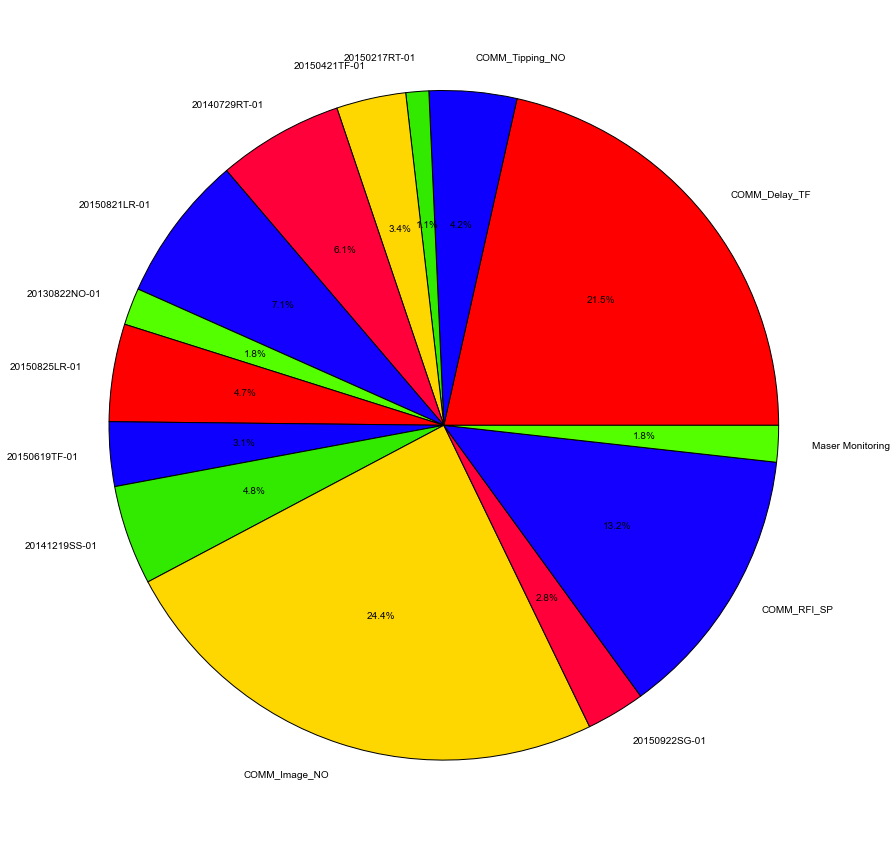

In [22]:
plt.figure(figsize=(15,15))
plt.pie(a_time,labels=a_id,colors=colors,autopct='%1.1f%%');

In [23]:
plt.show()

In [24]:
fi.metadata.InstructionSet

u'/home/kat/comm/scripts/f_engine_phased_beamform_dualpol.py -o Neil -f 1822 -t 10 --sb-id-code=20160203-0009 radec,0,-90'